In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt


df=pd.read_csv("https://raw.githubusercontent.com/mpaydar/Data-Analysis-Personal-Projects/main/Data%20Modeling/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Number of rows and columns

In [2]:
rows,columns=df.shape
print(f'# of rows:{rows} \n# of columns:{columns}')

# of rows:119390 
# of columns:32


## Name of the columns

In [3]:
columns_name=df.columns
columns_name

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Optimizing Readibility -renaming 'adr' column

In [4]:
df.rename(columns={'adr':'Average Daily Rate','agent':'TravelAgencyID'},inplace=True)
columns_name=df.columns
columns_name

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'TravelAgencyID', 'company', 'days_in_waiting_list', 'customer_type',
       'Average Daily Rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

## Check Null Values

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
TravelAgencyID                     16340
company         

Looks like there are 3 columns that need attention since they have number some number of null values.

## Null Percentage Table: 'country','agent','company'

In [6]:
null_percentage_table=df[['country','TravelAgencyID','company']]
null_percentage_table=pd.DataFrame({"Null Total":null_percentage_table.isnull().sum()})
null_percentage_table["Null Percentage"]=(null_percentage_table["Null Total"] / rows) * 100
null_percentage_table

,Null Total,Null Percentage
country,488,0.408744
TravelAgencyID,16340,13.686238
company,112593,94.306893


Company column has 94 percent of its data missing , so it would be wise to drop the column entirely. TravelAgencyID column is missing 13.6 percent and country has less than 1 percent of its data missing. We can take a bit closer look to these columns after dropping the company column

## Dropping Company Column:

In [7]:
df.drop(columns=['company'], inplace=True)
columns_name=df.columns
columns_name

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'TravelAgencyID', 'days_in_waiting_list', 'customer_type',
       'Average Daily Rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

Company Column has been dropped.

## Unique values table 

In [8]:
def generate_unique_value_Table():
    unique_values={}
    sum_values=[]
    for column in range(len(columns_name)):
        unique_values[columns_name[column]]=df[columns_name[column]].unique()

    unique_table=pd.DataFrame({"Unique Values": unique_values})
    unique_table=unique_table.reset_index()
    unique_table.rename(columns={'index':'Column Names'}, inplace='True')
    unique_table

    for i in unique_table['Unique Values'][:]:
        sum_values.append(len(i))


    unique_table['Sum of Unique Values']=sum_values
    return unique_table
table=generate_unique_value_Table()
table

,Column Names,Unique Values,Sum of Unique Values
0,Average Daily Rate,"[0.0, 75.0, 98.0, 107.0, 103.0, 82.0, 105.5, 1...",8879
1,TravelAgencyID,"[nan, 304.0, 240.0, 303.0, 15.0, 241.0, 8.0, 2...",334
2,adults,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]",14
3,arrival_date_day_of_month,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",31
4,arrival_date_month,"[July, August, September, October, November, D...",12
5,arrival_date_week_number,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",53
6,arrival_date_year,"[2015, 2016, 2017]",3
7,assigned_room_type,"[C, A, D, E, G, F, I, B, H, P, L, K]",12
8,babies,"[0, 1, 2, 10, 9]",5
9,booking_changes,"[3, 4, 0, 1, 2, 5, 17, 6, 8, 7, 10, 16, 9, 13,...",21


In [55]:
# df=df.dropna()
# df=df.reset_index(drop=True)

## Replacing missing Travel Agency IDs with 0 

In [9]:
df['TravelAgencyID']=df['TravelAgencyID'].replace(np.nan,0)

In [10]:
print(f"Number of null values in TravelAgencyID: {df['TravelAgencyID'].isnull().sum()}")

Number of null values in TravelAgencyID: 0


## Dropping rows with missing country

In [11]:
df = df.dropna(subset=['country'])

In [12]:
print(f"Number of null values in country column: {df['country'].isnull().sum()}")

Number of null values in country column: 0


## Statistical Information Of The Data

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,TravelAgencyID,days_in_waiting_list,Average Daily Rate,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118898.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104207,0.007948,0.032010,0.087139,0.131629,0.221174,74.893938,2.330676,102.000808,0.061883,0.571706
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399172,0.097379,0.176026,0.845855,1.484647,0.652775,107.144715,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


## Data Types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118902 non-null  int64  
 12  meal            

## Correlation Matrix

<AxesSubplot:>

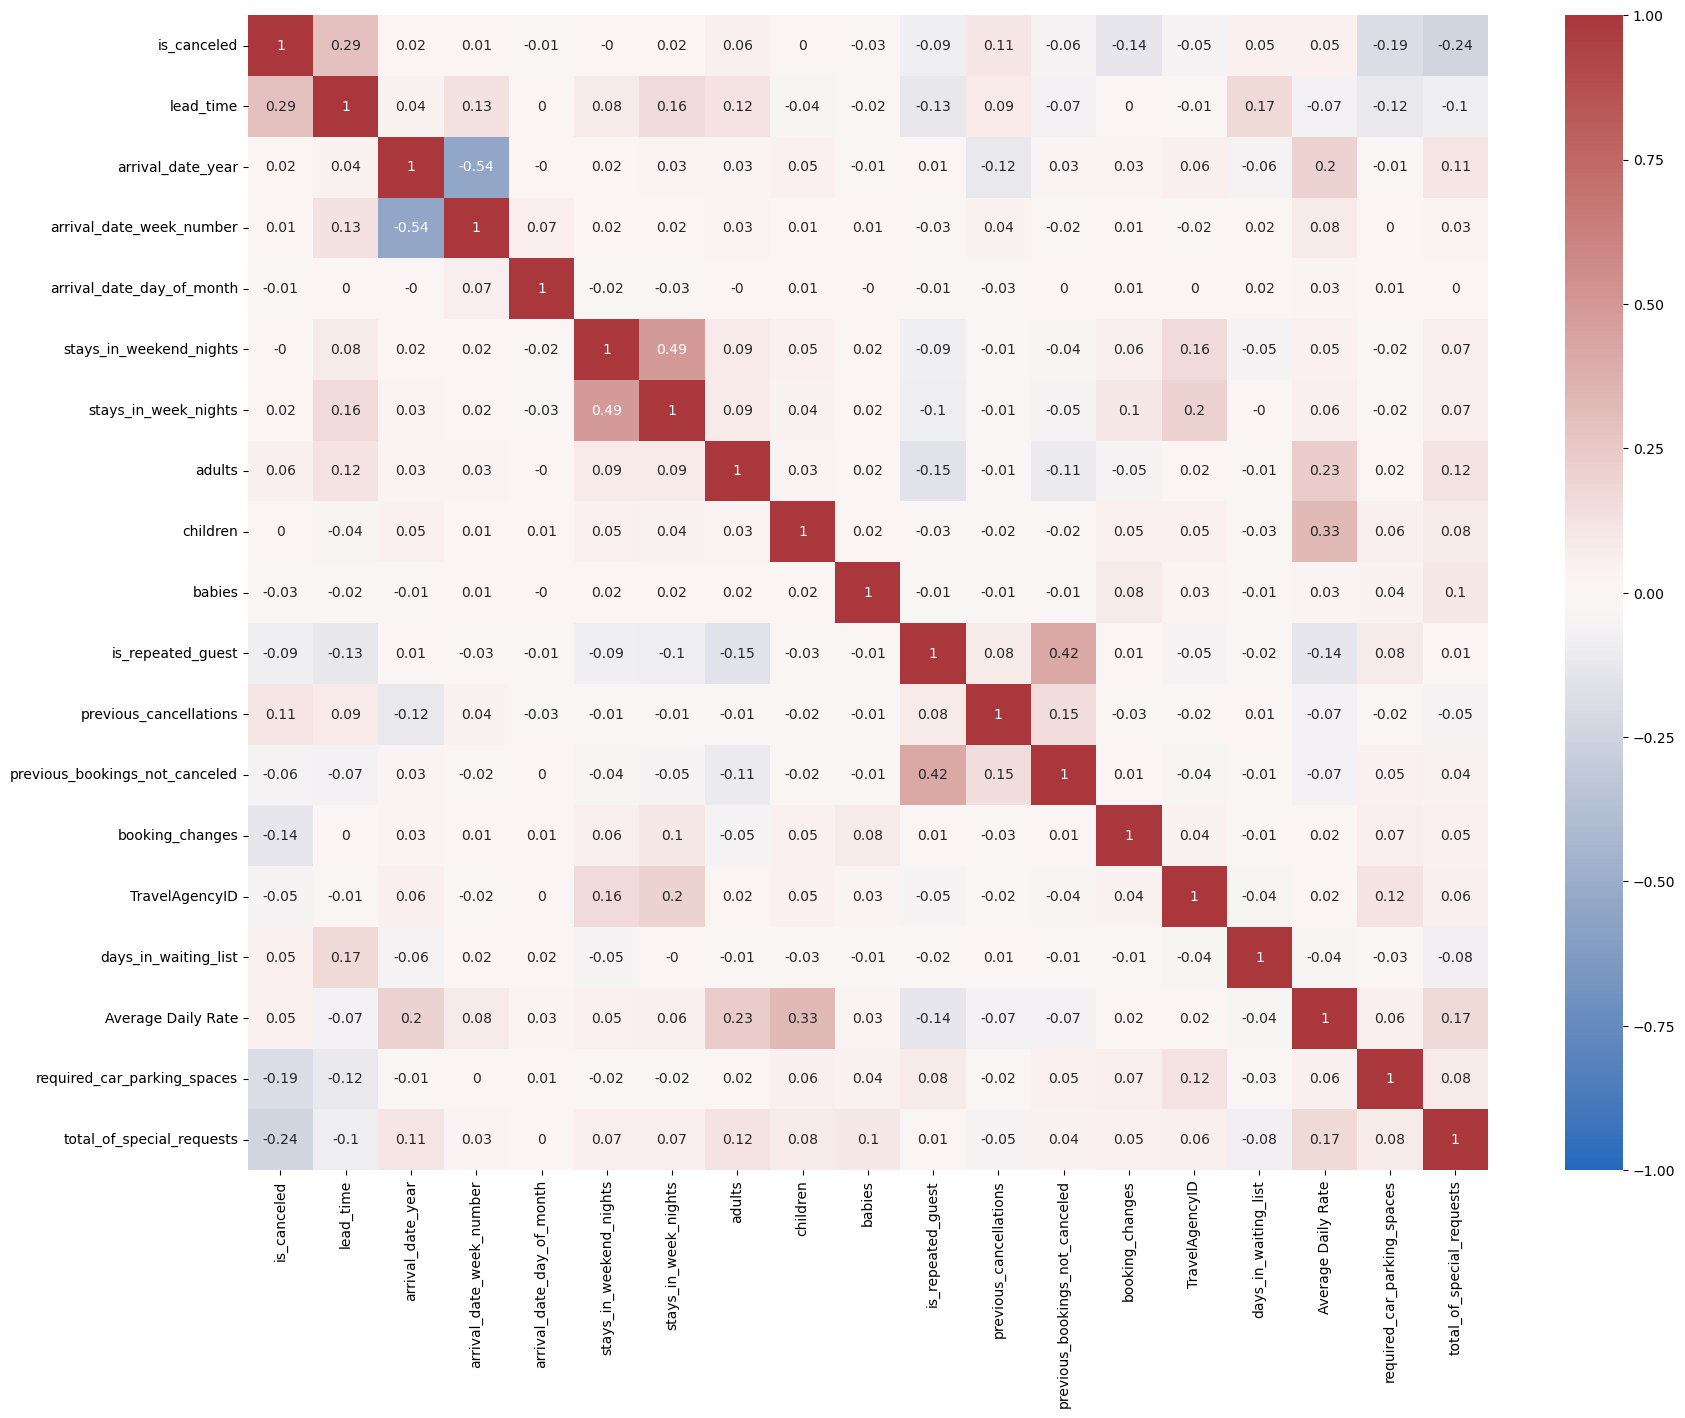

In [23]:
plt.subplots(figsize=(20,15))
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,cmap='vlag',)

To better read the above correlation matix, it would be a better idea to enhance its readibility . The upper part of matrix looks redundant as it contains repititive values in the matix. 

## Enhacning correlation matrix readbility 

In [41]:
matrix=df.corr().round(2)

# np.triu: numpy function making the upper triangle of matrix True and the rest Falsee
# np.ones_like(matrix,dtype) numpy function returns array of one with the same shape of the given matrix
mask=np.triu(np.ones_like(matrix,dtype=bool))


<AxesSubplot:>

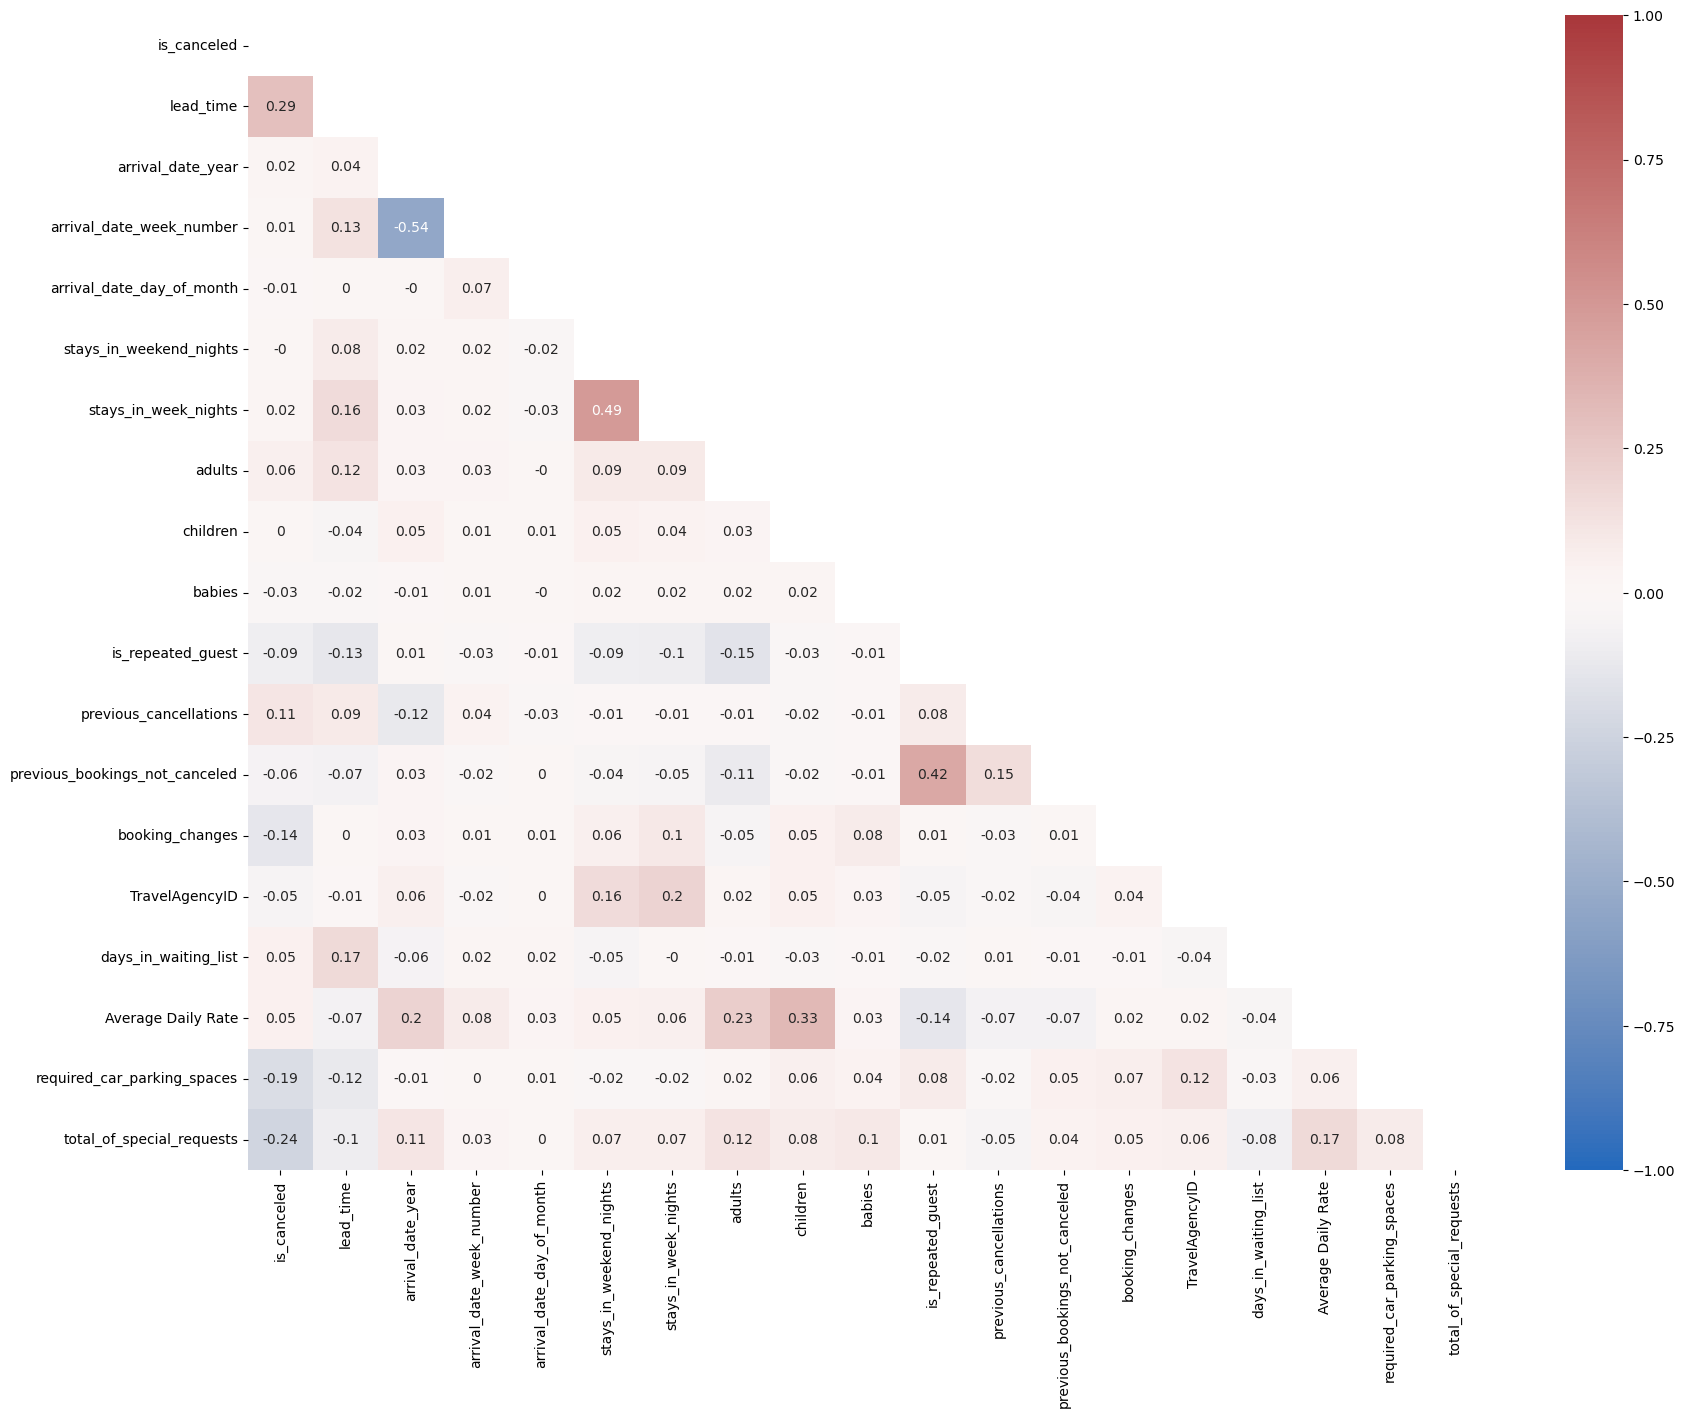

In [27]:
plt.subplots(figsize=(20,15))
sns.heatmap(matrix,annot=True,vmax=1,vmin=-1,cmap='vlag',mask=mask)

The matrix looks much better as the redundant values are off the matrix.
Looking at matrix,we see the strongest correlation in the dataset is ***0.49 which is between the relation between stays_in_week_night & stay in weekend nights***. If a hotel has booking in the week days ,it will have booking in the weekends. The next interesting correlation is ***previous_booking_not_canceled & repeated guess,0.42***. It would be interesting to see what factors effect this trend.Other notable relation are **average daily rate & children (0.33),lead time & is canceled(0.29)**.

## Visualization - Number of city vs. resort hotel

In [45]:
hotel_type=df['hotel'].value_counts()
hotel_type

City Hotel      79306
Resort Hotel    39596
Name: hotel, dtype: int64

## City Hotel vs. Resort Hotel

Text(0.5, 1.0, 'Hotel Type vs. Sum of Hotel')

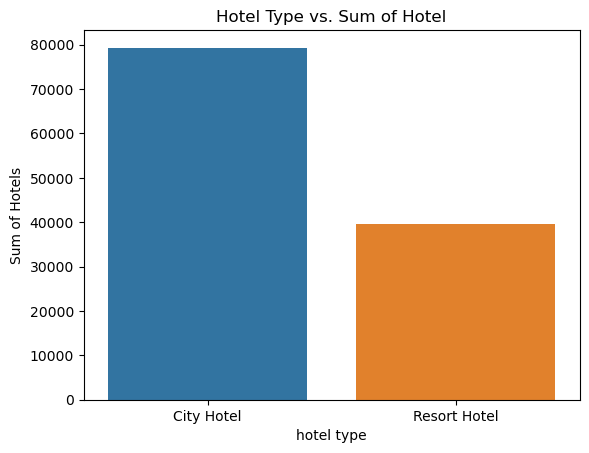

In [94]:
sns.barplot(x=hotel_type.index,y=hotel_type.values)
plt.xlabel("hotel type")
plt.ylabel("Sum of Hotels")
plt.title("Hotel Type vs. Sum of Hotel")

## Hotel-Pivot Table

In [61]:
hotel_table=df[['hotel','is_canceled','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','booking_changes','Average Daily Rate','arrival_date_month']]
pd.pivot_table(df,index='hotel',values='is_canceled',aggfunc=['sum','mean'])

,sum,mean
,is_canceled,is_canceled
hotel,,
City Hotel,33076,0.417089
Resort Hotel,11077,0.279750


This table shows meaningful insights. When comparing the type of hotel we see cancelations are almost 2 time more for the city hotel compared to resort hotel. Another interesting fact is the booking changes value: 0.18(city hotel) vs  resort hotel(0.28).

In [92]:
hotel_month=pd.pivot_table(df,index='hotel',columns='arrival_date_month',values='is_canceled',aggfunc=['sum'])


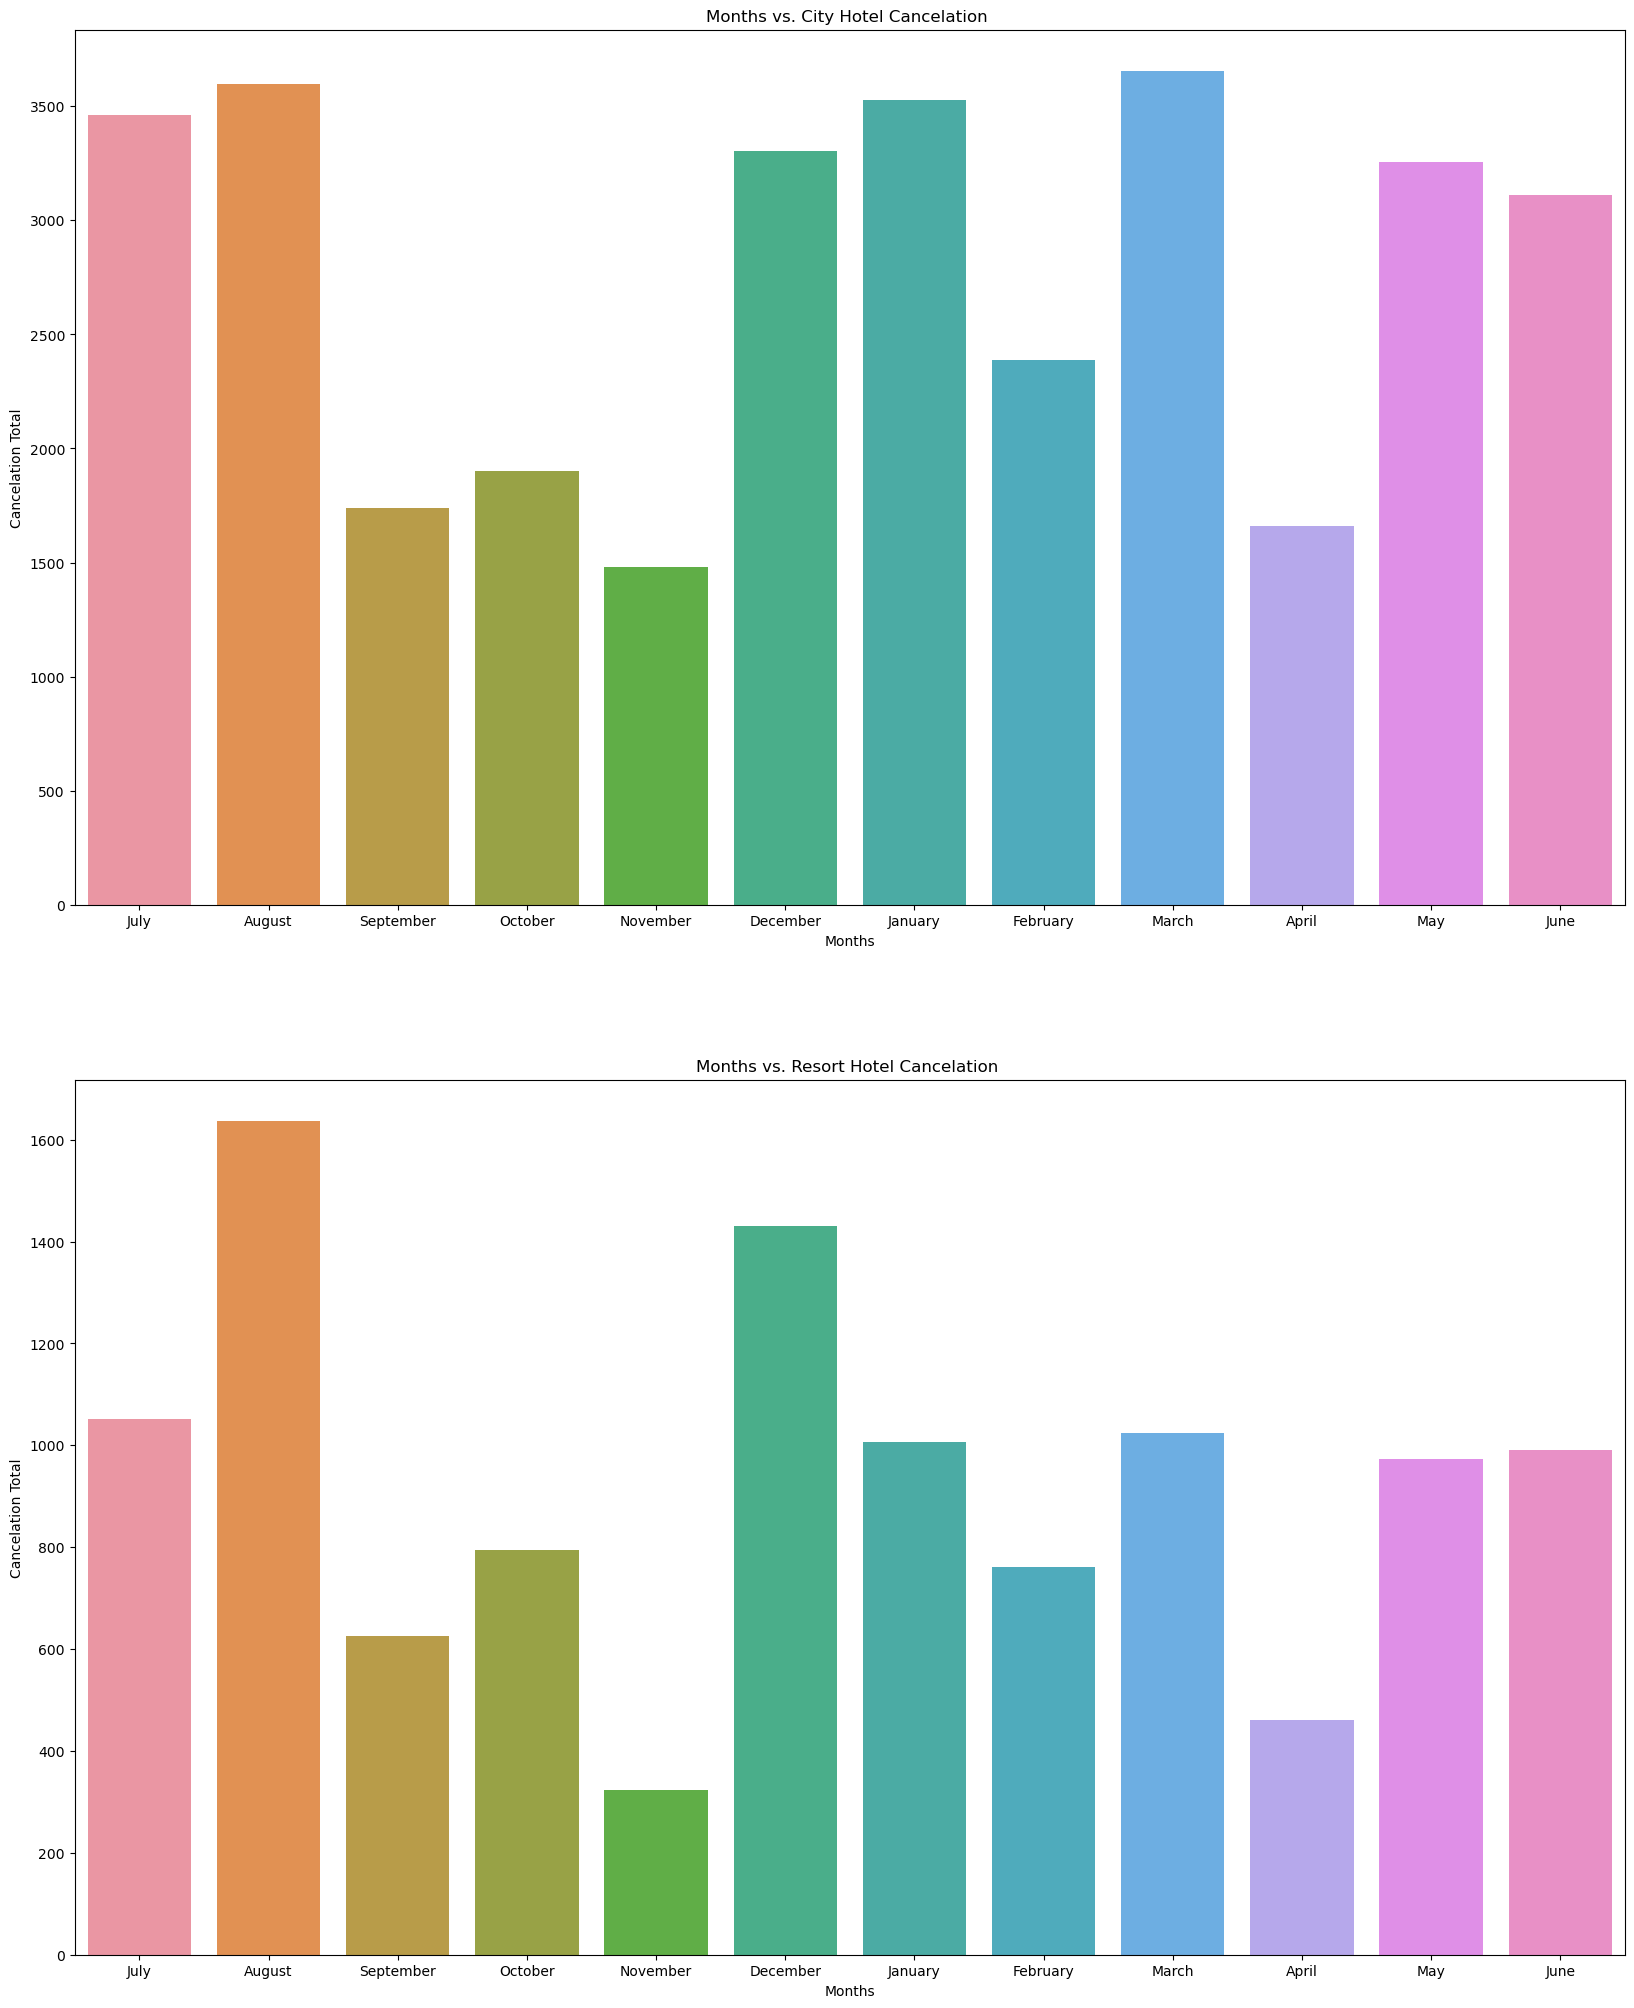

In [93]:
figure, (ax1,ax2) = plt.subplots(2, 1,figsize=(20,25))
months=df['arrival_date_month'].unique()
hotel_types=df['hotel'].unique()
sns.barplot(x=months,y=hotel_month.values[0],data=hotel_table,ax=ax1)
ax1.set_title("Months vs. City Hotel Cancelation ")
ax1.set_xlabel("Months")
ax1.set_ylabel("Cancelation Total")


sns.barplot(x=months,y=hotel_month.values[1],data=hotel_table,ax=ax2)
ax2.set_title("Months vs. Resort Hotel Cancelation ")
ax2.set_xlabel("Months")
ax2.set_ylabel("Cancelation Total")


plt.show()